In [58]:
from sklearn.datasets import fetch_openml
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_predict, cross_val_score
from sklearn.metrics import ConfusionMatrixDisplay, confusion_matrix
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import precision_score, recall_score, f1_score
from sklearn.model_selection import GridSearchCV
from scipy.ndimage import shift
import matplotlib.pyplot as plt

dados = fetch_openml('mnist_784', as_frame=False)

X, Y= dados.data, dados.target
X.shape

(70000, 784)

In [38]:
import numpy as np

# Assuming X_train and Y_train are numpy arrays
X_train, X_test, Y_train, Y_test = X[:60000], X[60000:], Y[:60000], Y[60000:]
print(X_train.shape)
X_train = X_train.reshape(-1, 28, 28)  # Reshape to 2D images
# Function to augment by shifting in all directions
def direction(image):
    right = shift(image, shift=(0, 1), mode='constant', cval=0)
    left = shift(image, shift=(0, -1), mode='constant', cval=0)
    top = shift(image, shift=(-1, 0), mode='constant', cval=0)
    bottom = shift(image, shift=(1, 0), mode='constant', cval=0)
    return [right, left, top, bottom]

# Augment dataset using shifted images
X_train_augmented = []
Y_train_augmented = []

for i in range(len(X_train)):
    # Original image
    X_train_augmented.append(X_train[i])
    Y_train_augmented.append(Y_train[i])

    # Shifted images
    shifted_images = direction(X_train[i])
    for shifted_image in shifted_images:
        X_train_augmented.append(shifted_image)
        Y_train_augmented.append(Y_train[i])

# Convert back to numpy arrays
X_train_augmented = np.array(X_train_augmented)
Y_train_augmented = np.array(Y_train_augmented)

print("Original training set size:", len(X_train))
print("Augmented training set size:", len(X_train_augmented))


(60000, 784)
Original training set size: 60000
Augmented training set size: 300000


In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train_augmented.astype("float32").reshape(-1,784))
X_test = scaler.transform(X_test.astype("float64"))

In [40]:
modelo = RandomForestClassifier(n_estimators=300 random_state=60)
modelo.fit(X_train, Y_train_augmented)
pred = modelo.predict(X_test)


In [50]:
print(pred)
print(Y_test)

['7' '2' '1' ... '4' '5' '6']
['7' '2' '1' ... '4' '5' '6']


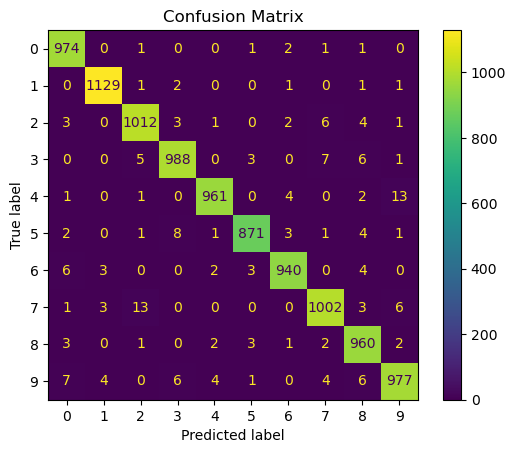

In [51]:
ConfusionMatrixDisplay(confusion_matrix(Y_test,pred)).plot()
plt.title("Confusion Matrix")
plt.show()

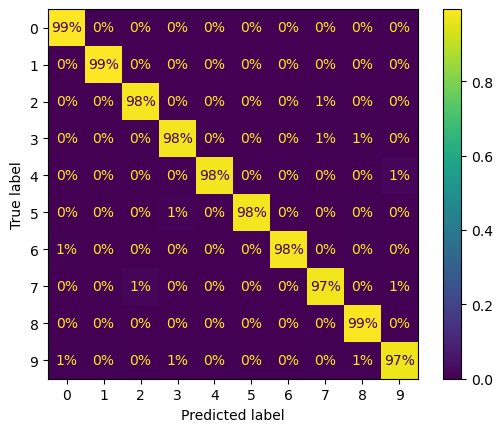

In [52]:
ConfusionMatrixDisplay.from_predictions(Y_test, pred,normalize='true', values_format='.0%')
plt.show()

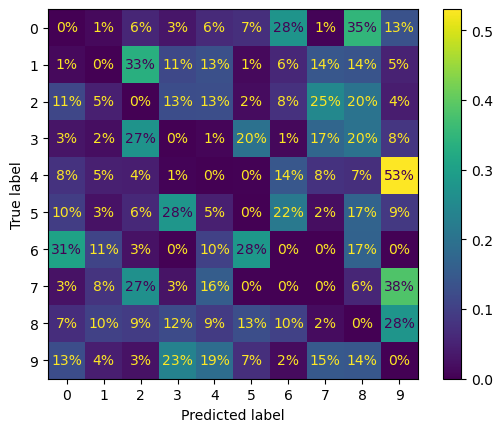

In [53]:
Errors = (hey != Y_train_augmented_int)
ConfusionMatrixDisplay.from_predictions(Y_train_augmented_int, hey, sample_weight=Errors, normalize = 'true', values_format='.0%')
plt.show()

In [59]:
print(precision_score(Y_test, pred, average='weighted'))
print(recall_score(Y_test, pred,  average='weighted'))
print(f1_score(Y_test, pred, average='weighted' ))

0.9814385646535054
0.9814
0.9813959584857881
